In [5]:
import portfolio_utils as pu

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [15]:
#Select Rebalance Dates
rebalance_dates = [
    "2021-01-01","2021-02-01","2021-03-01",
    "2021-04-01","2021-05-01","2021-06-01",
    "2021-07-01","2021-08-01","2021-09-01",
    "2021-10-01","2021-11-01","2021-12-01",]
#Portfolio Start and Stop Dates
start="2021-02-20" 
endp1="2021-08-26"


initial_investment = 10000
symbols = ["BTCUSD", "ETHUSD", "ADAUSDC"]
portfolio_weights = np.array([1/3,1/3,1/3]) # this is the weight of the coins in the portfolio

# some nice code curtesy of Kevin
agg_data = list()
data_path = "data/crypto-data.csv"
crypto = pd.read_csv(data_path)
crypto_ = crypto[["tradeDate", "symbol", "avg_latest"]]
crypto_ = crypto_.pivot_table(index="tradeDate", columns="symbol", values = "avg_latest")
crypto2_ = crypto_.pct_change()
crypto2_ = crypto2_[3:]

df = crypto2_[symbols]
clean_return_history = df.reset_index(drop=True)
clean_return_history['date']=pu.date_cleaner(crypto2_.index)


In [16]:
# Instantiate the portfolio object
portfolio_obj = pu.Portfolio(
    data=clean_return_history, 
    symbols=symbols, 
    weights=portfolio_weights, 
    initial_investment=initial_investment,
    start_date=start,
    end_date=endp1, 
    rebalance_dates=rebalance_dates)

In [17]:
# Simulate the returns of the portfolio
portfolio_obj.estimate_portfolio_returns()


In [18]:
# Shows the Sharpe Ratio for the individual coins as well as the SR of the portfolio
portfolio_obj.get_sharpe_report()

,BTCUSD,ETHUSD,ADAUSDC,Portfolio SR
0,148.691999,95.900398,63.672101,105.677789


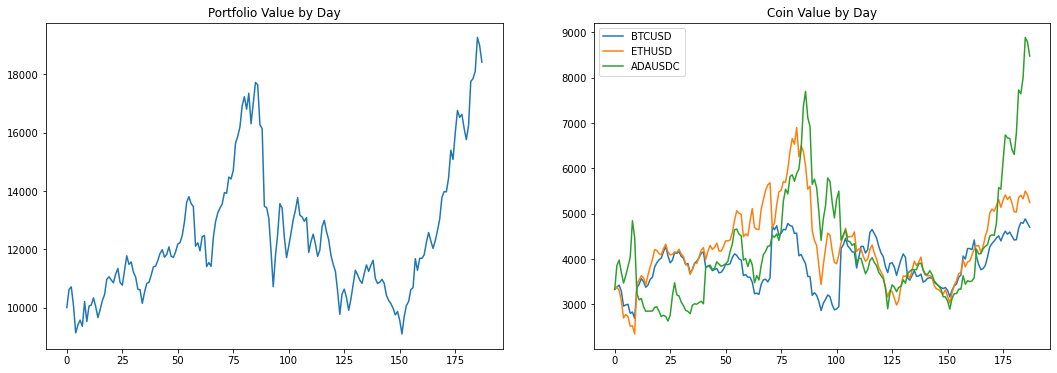

In [19]:
# show the returns of the portfolio and individual coins
_=plt.figure(figsize=(18,6))

_=plt.subplot(1, 2, 1)
plt.plot(np.sum(portfolio_obj.daily_portfolio_values, axis=1))
plt.title("Portfolio Value by Day" )
_=plt.subplot(1, 2, 2)
plt.title("Coin Value by Day" )
for i in range(len(symbols)):
    plt.plot(portfolio_obj.daily_portfolio_values[:,i], label=symbols[i])
plt.legend()